In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pickle

# Phase 0: Load Data

In [2]:
def LoadData():
    sample_files = []
    annotation_files = []
    
    for file_index in range(1, 74):
        sample_files.append(np.loadtxt('dataset\\samples_' + str(file_index) + '.csv', delimiter = ',', dtype='float', skiprows=2, usecols=1))
        annotation_files.append(np.loadtxt('dataset\\annotation_' + str(file_index) + '.csv', delimiter = ',', dtype='float', skiprows=1, usecols=0))
    
    return sample_files, annotation_files

In [3]:
def plot_signal(x, y):
    fig = plt.figure(figsize=(15, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.set_xlabel('ECG')
    ax1.set_ylabel('mV') 
    ax1.plot(np.arange(0,400,1), x[:400], label = 'X')
    
    ax2.set_xlabel('ECG')
    ax2.set_ylabel('Annotation') 
    ax2.plot(np.arange(0,400,1), y[:400], label = 'Y')    

Sample Files : 73
Annotation Files : 73


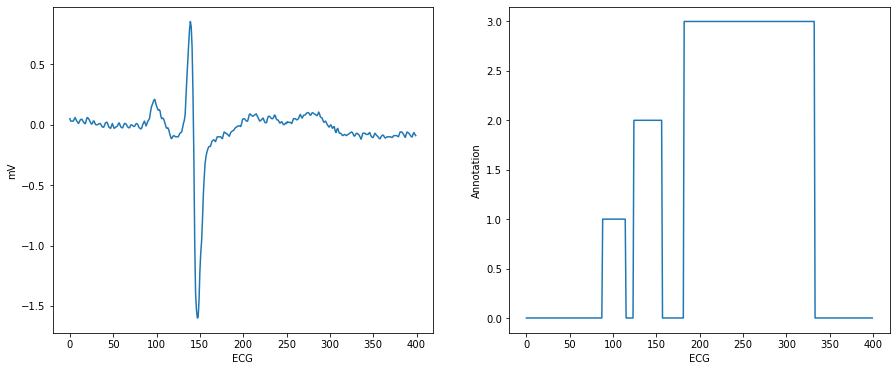

In [4]:
# Load Data
Sample_files, Annotation_files = LoadData()

print('Sample Files :', len(Sample_files))
print('Annotation Files :', len(Annotation_files))

# Plot A Sample Signal
plot_signal(Sample_files[0], Annotation_files[0])

# Phase 1: Data Preprocessing

In [5]:
def GenerateData(samples, annotations, testsize=0.20, window_size=11, show_report=True):    
    
    rows = 0
    for sample in samples:
        rows += sample.shape[0]
    rows = rows - window_size+1
    
    X_train = []
    y_train = []
    y_train_onehot = []
    X_test = []
    y_test = []
    y_test_onehot = []
    
    for index in range(len(samples)):
        sample = samples[index]
        annotation = annotations[index]
        
        x = np.zeros((sample.shape[0]-window_size+1 , window_size*2-1))
        y = np.zeros(sample.shape[0]-window_size+1)
        
        for i in range(0, x.shape[0]):
            k = 0 
            for j in range(0, x.shape[1]):
                if k < window_size-1 :
                    if np.mod(j,2)==0 :
                        x[i, j] = sample[i+k]
                    else:
                        x[i, j] = annotation[i+k]
                        k += 1
                else:                
                    x[i, j] = sample[i+k]
                    y[i] = annotation[i+k]
        
        if testsize > 0 :
            X_train_signal, X_test_signal, y_train_signal, y_test_signal = train_test_split(x, y, test_size=testsize, random_state=20)
        else:
            X_train_signal, X_test_signal, y_train_signal, y_test_signal = x, x, y, y
        
        # OneHot Encoding
        ohe = OneHotEncoder()
        y_train_onehot_signal = ohe.fit_transform(np.asmatrix(y_train_signal).T).toarray()
        y_test_onehot_signal = ohe.fit_transform(np.asmatrix(y_test_signal).T).toarray()     
        
        # Aggregate
        for i in range(X_train_signal.shape[0]):
            X_train.append(X_train_signal[i].tolist())
            y_train.append(y_train_signal[i].tolist())
            y_train_onehot.append(y_train_onehot_signal[i].tolist())        
        for i in range(X_test_signal.shape[0]):
            X_test.append(X_test_signal[i].tolist())
            y_test.append(y_test_signal[i].tolist())
            y_test_onehot.append(y_test_onehot_signal[i].tolist())
        
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train_onehot = np.array(y_train_onehot)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test_onehot = np.array(y_test_onehot)
        
    m = X_train.shape[0]
    mtest = X_test.shape[0]
    
    if show_report:
        print('X_train.shape =', X_train.shape)
        print('y_train.shape =', y_train.shape)
        print('y_train_onehot.shape =', y_train_onehot.shape)
        print('X_test.shape =', X_test.shape)
        print('y_test.shape =', y_test.shape)
        print('y_test_onehot.shape =', y_test_onehot.shape)
        print('Train & Test Data Splited With Rate : ' + str(int(testsize*100)) + ' %')

    return X_train, y_train, y_train_onehot, m, X_test, y_test, y_test_onehot, mtest

### Generate Patterns And Save In Files

In [6]:
def save_patterns(window_size, test_size, show_report=True):
    print('')
    print('-----------------------------------------------------')
    print('Window Size =', window_size)
    print('')
    
    # Generate Data
    X_train, y_train, y_train_onehot, m, X_test, y_test, y_test_onehot, mtest = GenerateData(Sample_files, Annotation_files, 
                                                                                             testsize=test_size, window_size=window_size, show_report=True)

    # Save Data In Files
    pfile = open('files\\X_train_' + str(window_size) + '_' + str(int(test_size*100)),'wb')
    pickle.dump(X_train, pfile)
    pfile.close()

    pfile = open('files\\y_train_' + str(window_size) + '_' + str(int(test_size*100)),'wb')
    pickle.dump(y_train, pfile)
    pfile.close()

    pfile = open('files\\y_train_onehot_' + str(window_size) + '_' + str(int(test_size*100)),'wb')
    pickle.dump(y_train_onehot, pfile)
    pfile.close()

    pfile = open('files\\m_' + str(window_size) + '_' + str(int(test_size*100)),'wb')
    pickle.dump(m, pfile)
    pfile.close()

    pfile = open('files\\X_test_' + str(window_size) + '_' + str(int(test_size*100)),'wb')
    pickle.dump(X_test, pfile)
    pfile.close()

    pfile = open('files\\y_test_' + str(window_size) + '_' + str(int(test_size*100)),'wb')
    pickle.dump(y_test, pfile)
    pfile.close()

    pfile = open('files\\y_test_onehot_' + str(window_size) + '_' + str(int(test_size*100)),'wb')
    pickle.dump(y_test_onehot, pfile)
    pfile.close()

    pfile = open('files\\mtest_' + str(window_size) + '_' + str(int(test_size*100)),'wb')
    pickle.dump(mtest, pfile)
    pfile.close()

    print('')
    print('Save Data In Files..Done.')
    print('-----------------------------------------------------')
    print('')

In [9]:
window_sizes = [5, 11, 21]

for window_size in window_sizes:
    save_patterns(window_size, test_size=0.20, show_report=True)


-----------------------------------------------------
Window Size = 5

X_train.shape = (595708, 9)
y_train.shape = (595708,)
y_train_onehot.shape = (595708, 4)
X_test.shape = (149000, 9)
y_test.shape = (149000,)
y_test_onehot.shape = (149000, 4)
Train & Test Data Splited With Rate : 20 %

Save Data In Files..Done.
-----------------------------------------------------


-----------------------------------------------------
Window Size = 11

X_train.shape = (595416, 21)
y_train.shape = (595416,)
y_train_onehot.shape = (595416, 4)
X_test.shape = (148854, 21)
y_test.shape = (148854,)
y_test_onehot.shape = (148854, 4)
Train & Test Data Splited With Rate : 20 %

Save Data In Files..Done.
-----------------------------------------------------


-----------------------------------------------------
Window Size = 21

X_train.shape = (594832, 41)
y_train.shape = (594832,)
y_train_onehot.shape = (594832, 4)
X_test.shape = (148708, 41)
y_test.shape = (148708,)
y_test_onehot.shape = (148708, 4)
Tra

### Load Generated Patterns From Files

In [14]:
def load_patterns(window_size, test_size, show_report=True):
    if show_report:
        print('')
        print('-----------------------------------------------------')
        print('Window Size =', window_size)
        print('')
    
    # Load Data From Files
    pfile = open('files\\X_train_' + str(window_size) + '_' + str(int(test_size*100)),'rb')
    X_train = pickle.load(pfile)
    pfile.close()

    pfile = open('files\\y_train_' + str(window_size) + '_' + str(int(test_size*100)),'rb')
    y_train = pickle.load(pfile)
    pfile.close()

    pfile = open('files\\y_train_onehot_' + str(window_size) + '_' + str(int(test_size*100)),'rb')
    y_train_onehot = pickle.load(pfile)
    pfile.close()

    pfile = open('files\\m_' + str(window_size) + '_' + str(int(test_size*100)),'rb')
    m = pickle.load(pfile)
    pfile.close()

    pfile = open('files\\X_test_' + str(window_size) + '_' + str(int(test_size*100)),'rb')
    X_test = pickle.load(pfile)
    pfile.close()

    pfile = open('files\\y_test_' + str(window_size) + '_' + str(int(test_size*100)),'rb')
    y_test = pickle.load(pfile)
    pfile.close()

    pfile = open('files\\y_test_onehot_' + str(window_size) + '_' + str(int(test_size*100)),'rb')
    y_test_onehot = pickle.load(pfile)
    pfile.close()

    pfile = open('files\\mtest_' + str(window_size) + '_' + str(int(test_size*100)),'rb')
    mtest = pickle.load(pfile)
    pfile.close()
    
    if show_report:
        print('Load Data From Files..Done.')
        print('')
        print('X_train.shape =', X_train.shape)
        print('y_train.shape =', y_train.shape)
        print('y_train_onehot.shape =', y_train_onehot.shape)
        print('X_test.shape =', X_test.shape)
        print('y_test.shape =', y_test.shape)
        print('y_test_onehot.shape =', y_test_onehot.shape)
        print('Train & Test Data Splited With Rate : ' + str(int(test_size*100)) + ' %')

        print('')
        print('Save Data In Files..Done.')
        print('-----------------------------------------------------')
        print('')
        
    return X_train, y_train, y_train_onehot, m, X_test, y_test, y_test_onehot, mtest

In [15]:
window_sizes = [5, 11, 21]

for window_size in window_sizes:
    _,_,_,_,_,_,_,_ = load_patterns(window_size, test_size=0.20, show_report=True)


-----------------------------------------------------
Window Size = 5

Load Data From Files..Done.

X_train.shape = (595708, 9)
y_train.shape = (595708,)
y_train_onehot.shape = (595708, 4)
X_test.shape = (149000, 9)
y_test.shape = (149000,)
y_test_onehot.shape = (149000, 4)
Train & Test Data Splited With Rate : 20 %

Save Data In Files..Done.
-----------------------------------------------------


-----------------------------------------------------
Window Size = 11

Load Data From Files..Done.

X_train.shape = (595416, 21)
y_train.shape = (595416,)
y_train_onehot.shape = (595416, 4)
X_test.shape = (148854, 21)
y_test.shape = (148854,)
y_test_onehot.shape = (148854, 4)
Train & Test Data Splited With Rate : 20 %

Save Data In Files..Done.
-----------------------------------------------------


-----------------------------------------------------
Window Size = 21

Load Data From Files..Done.

X_train.shape = (594832, 41)
y_train.shape = (594832,)
y_train_onehot.shape = (594832, 4)
X_t

# Phase 2: Recurrent Neural Networks : Elman

In [10]:
def sigmoid(x):
    ''' Sigmoid like function using tanh '''
    #return np.tanh(x)
    return 1/(1+np.exp(-x))

In [11]:
def dsigmoid(x):
    ''' Derivative of sigmoid above '''
    #return 1.0-x**2
    return x*(1-x)

In [12]:
class Elman:
    ''' Elamn network '''
    

    def __init__(self, *args):
        ''' Initialization of the perceptron with given sizes.  '''

        self.shape = args
        n = len(args)

        # Build layers
        self.layers = []

        # Input layer (+1 unit for bias
        #              +size of first hidden layer)
        self.layers.append(np.ones(self.shape[0]+1+self.shape[1]))

        # Hidden layer(s) + output layer
        for i in range(1,n):
            self.layers.append(np.ones(self.shape[i]))

        # Build weights matrix
        self.weights = []
        for i in range(n-1):
            self.weights.append(np.zeros((self.layers[i].size,
                                          self.layers[i+1].size)))

        # dw will hold last change in weights (for momentum)
        self.dw = [0,]*len(self.weights)

        # Reset weights
        self.reset()


    def reset(self):
        ''' Reset weights '''

        for i in range(len(self.weights)):
            Z = np.random.random((self.layers[i].size,self.layers[i+1].size))
            self.weights[i][...] = (2*Z-1)*0.25


    def propagate_forward(self, data):
        ''' Propagate data from input layer to output layer. '''

        # Set input layer with data
        self.layers[0][:self.shape[0]] = data
        # and first hidden layer
        self.layers[0][self.shape[0]:-1] = self.layers[1]

        # Propagate from layer 0 to layer n-1 using sigmoid as activation function
        for i in range(1,len(self.shape)):
            # Propagate activity
            self.layers[i][...] = sigmoid(np.dot(self.layers[i-1],self.weights[i-1]))

        # Return output
        return self.layers[-1]


    def propagate_backward(self, target, lrate=0.1, momentum=0.1):
        ''' Back propagate error related to target using lrate. '''

        deltas = []

        # Compute error on output layer
        error = target - self.layers[-1]
        delta = error*dsigmoid(self.layers[-1])
        deltas.append(delta)

        # Compute error on hidden layers
        for i in range(len(self.shape)-2,0,-1):
            delta = np.dot(deltas[0],self.weights[i].T)*dsigmoid(self.layers[i])
            deltas.insert(0,delta)
            
        # Update weights
        for i in range(len(self.weights)):
            layer = np.atleast_2d(self.layers[i])
            delta = np.atleast_2d(deltas[i])
            dw = np.dot(layer.T,delta)
            self.weights[i] += lrate*dw + momentum*self.dw[i]
            self.dw[i] = dw

        # Return error
        return (error**2).sum()

In [13]:
window_sizes = [5, 11, 21]
epochs = 5

Elman_train_acc = np.zeros((len(window_sizes), 1))
Elman_test_acc = np.zeros((len(window_sizes), 1))

In [14]:
for window_size in window_sizes:
    # Load Data
    X_train, y_train, y_train_onehot, m, X_test, y_test, y_test_onehot, mtest = load_patterns(window_size, test_size=0.20, show_report=False)

    # Create Model
    input_nodes = X_train.shape[1]
    hidden_nodes = window_size
    output_nodes = y_train_onehot.shape[1]
    network = Elman(input_nodes, hidden_nodes, output_nodes)

    # Train Model
    y_train_pred = np.zeros((y_train.shape[0]))          
    for epoch in range(epochs):
        for j in range(X_train.shape[0]):
            train_output = network.propagate_forward(X_train[j])
            train_loss = network.propagate_backward(y_train_onehot[j])
            y_train_pred[j] = np.argmax(train_output)

    # Prediction With Model
    y_test_pred = np.zeros((y_test.shape[0]))
    for j in range(X_test.shape[0]):
        test_output = network.propagate_forward(X_test[j])
        y_test_pred[j] = np.argmax(test_output)                

    # Collect Results
    Elman_train_acc[window_sizes.index(window_size), 0] = accuracy_score(y_train_pred, y_train)
    Elman_test_acc[window_sizes.index(window_size), 0] = accuracy_score(y_test_pred, y_test)
            
# Report Results
print('-----------------------------------------------------------------')
print('Elman RNN :')
print('')
print('Elman Mean Train Accuracy (Window_sizes=[5, 11, 21]) =', np.mean(Elman_train_acc, axis=1))
print('Elman Mean Test  Accuracy (Window_sizes=[5, 11, 21]) =', np.mean(Elman_test_acc, axis=1))
print('')
print('-----------------------------------------------------------------')
            
            

-----------------------------------------------------------------
Elman RNN :

Elman Mean Train Accuracy (Window_sizes=[5, 11, 21]) = [0.97273161 0.97011165 0.96943002]
Elman Mean Test  Accuracy (Window_sizes=[5, 11, 21]) = [0.97261074 0.9371599  0.83029158]

-----------------------------------------------------------------


# Phase 3: Recurrent Neural Networks : NARX

In [16]:
def sigmoid(x):
    ''' Sigmoid like function using tanh '''
    #return np.tanh(x)
    return 1/(1+np.exp(-x))

In [17]:
def dsigmoid(x):
    ''' Derivative of sigmoid above '''
    #return 1.0-x**2
    return x*(1-x)

In [18]:
class Narx:
    ''' Narx network '''


    def __init__(self, *args):
        ''' Initialization of the perceptron with given sizes.  '''

        self.shape = args
        n = len(args)

        # Build layers
        self.layers = []

        # Input layer (+1 unit for bias
        #              +size of first hidden layer)
        self.layers.append(np.ones(self.shape[0]+1+self.shape[2]))

        # Hidden layer(s) + output layer
        for i in range(1,n):
            self.layers.append(np.ones(self.shape[i]))

        # Build weights matrix
        self.weights = []
        for i in range(n-1):
            self.weights.append(np.zeros((self.layers[i].size,
                                          self.layers[i+1].size)))

        # dw will hold last change in weights (for momentum)
        self.dw = [0,]*len(self.weights)

        # Reset weights
        self.reset()


    def reset(self):
        ''' Reset weights '''

        for i in range(len(self.weights)):
            Z = np.random.random((self.layers[i].size,self.layers[i+1].size))
            self.weights[i][...] = (2*Z-1)*0.25


    def propagate_forward(self, data):
        ''' Propagate data from input layer to output layer. '''

        # Set input layer with data
        self.layers[0][:self.shape[0]] = data
        # and first hidden layer
        self.layers[0][self.shape[0]:-1] = self.layers[2]

        # Propagate from layer 0 to layer n-1 using sigmoid as activation function
        for i in range(1,len(self.shape)):
            # Propagate activity
            self.layers[i][...] = sigmoid(np.dot(self.layers[i-1],self.weights[i-1]))

        # Return output
        return self.layers[-1]


    def propagate_backward(self, target, lrate=0.1, momentum=0.1):
        ''' Back propagate error related to target using lrate. '''

        deltas = []

        # Compute error on output layer
        error = target - self.layers[-1]
        delta = error*dsigmoid(self.layers[-1])
        deltas.append(delta)

        # Compute error on hidden layers
        for i in range(len(self.shape)-2,0,-1):
            delta = np.dot(deltas[0],self.weights[i].T)*dsigmoid(self.layers[i])
            deltas.insert(0,delta)
            
        # Update weights
        for i in range(len(self.weights)):
            layer = np.atleast_2d(self.layers[i])
            delta = np.atleast_2d(deltas[i])
            dw = np.dot(layer.T,delta)
            self.weights[i] += lrate*dw + momentum*self.dw[i]
            self.dw[i] = dw

        # Return error
        return (error**2).sum()

In [19]:
window_sizes = [5, 11, 21]
epochs = 5

NARX_train_acc = np.zeros((len(window_sizes), 1))
NARX_test_acc = np.zeros((len(window_sizes), 1))

In [20]:
for window_size in window_sizes:
    # Load Data
    X_train, y_train, y_train_onehot, m, X_test, y_test, y_test_onehot, mtest = load_patterns(window_size, test_size=0.20, show_report=False)

    # Create Model
    input_nodes = X_train.shape[1]
    hidden_nodes = window_size
    output_nodes = y_train_onehot.shape[1]
    network = Narx(input_nodes, hidden_nodes, output_nodes)

    # Train Model
    y_train_pred = np.zeros((y_train.shape[0]))          
    for epoch in range(epochs):
        for j in range(X_train.shape[0]):
            train_output = network.propagate_forward(X_train[j])
            train_loss = network.propagate_backward(y_train_onehot[j])
            y_train_pred[j] = np.argmax(train_output)

    # Prediction With Model
    y_test_pred = np.zeros((y_test.shape[0]))
    for j in range(X_test.shape[0]):
        test_output = network.propagate_forward(X_test[j])
        y_test_pred[j] = np.argmax(test_output)                

    # Collect Results
    NARX_train_acc[window_sizes.index(window_size), 0] = accuracy_score(y_train_pred, y_train)
    NARX_test_acc[window_sizes.index(window_size), 0] = accuracy_score(y_test_pred, y_test)
            
# Report Results
print('-----------------------------------------------------------------')
print('NARX RNN :')
print('')
print('NARX Mean Train Accuracy (Window_sizes=[5, 11, 21]) =', np.mean(NARX_train_acc, axis=1))
print('NARX Mean Test  Accuracy (Window_sizes=[5, 11, 21]) =', np.mean(NARX_test_acc, axis=1))
print('')
print('-----------------------------------------------------------------')
            
            

-----------------------------------------------------------------
NARX RNN :

NARX Mean Train Accuracy (Window_sizes=[5, 11, 21]) = [0.97208028 0.96932397 0.96892568]
NARX Mean Test  Accuracy (Window_sizes=[5, 11, 21]) = [0.97222148 0.83759254 0.79644673]

-----------------------------------------------------------------
